<a href="https://colab.research.google.com/github/zsxkib/Cog-in-Colab-Notebook-Examples/blob/main/GFPGAN_Cog_in_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Clone the Repository:
!git clone https://github.com/TencentARC/GFPGAN.git

Cloning into 'GFPGAN'...
remote: Enumerating objects: 523, done.
remote: Total 523 (delta 0), reused 0 (delta 0), pack-reused 523
Receiving objects: 100% (523/523), 5.39 MiB | 17.15 MiB/s, done.
Resolving deltas: 100% (264/264), done.


In [ ]:
# Navigate to the Repository:
%cd GFPGAN

/content/GFPGAN


In [ ]:
# Inspect cog.yaml to find out what we need to install
%cat cog.yaml

# This file is used for constructing replicate env
image: "r8.im/tencentarc/gfpgan"

build:
  gpu: true
  python_version: "3.8"
  system_packages:
    - "libgl1-mesa-glx"
    - "libglib2.0-0"
  python_packages:
    - "torch==1.7.1"
    - "torchvision==0.8.2"
    - "numpy==1.21.1"
    - "lmdb==1.2.1"
    - "opencv-python==4.5.3.56"
    - "PyYAML==5.4.1"
    - "tqdm==4.62.2"
    - "yapf==0.31.0"
    - "basicsr==1.4.2"
    - "facexlib==0.2.5"

predict: "cog_predict.py:Predictor"


In [ ]:
# Install required packages (if it's not already installed):
!pip install PyYAML
!pip install replicate cog

In [ ]:
# Parse cog.yaml and Install Packages:
import yaml
import subprocess
import inspect
import pydoc
import urllib.request

In [ ]:
# Load and parse cog.yaml
with open('cog.yaml', 'r') as file:
    cog_data = yaml.safe_load(file)

In [ ]:
# Get python version, system packages and python packages, and run commands if they exist
build_data = cog_data.get('build', {})
system_packages = build_data.get('system_packages', [])
python_packages = build_data.get('python_packages', [])
run_commands = build_data.get('run', [])

In [ ]:
# Function to execute shell commands
def execute_command(cmd):
    process = subprocess.Popen(cmd, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    stdout, stderr = process.communicate()
    if process.returncode != 0:
        print(f'Command failed with error: {stderr.decode()}')
    else:
        print(stdout.decode())

In [ ]:
# Install system packages
if system_packages:
    system_packages_cmd = f'apt-get install -y {" ".join(system_packages)}'
    execute_command(system_packages_cmd)

Reading package lists...
Building dependency tree...
Reading state information...
libglib2.0-0 is already the newest version (2.72.4-0ubuntu2.2).
libgl1-mesa-glx is already the newest version (23.0.4-0ubuntu1~22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.



In [ ]:
# Install python packages
if python_packages:
    for package in python_packages:
        # Split the package string at '==' to separate the package name from the version
        package_parts = package.split('==')
        if len(package_parts) == 2:
            # If a version is specified, change the command to accept newer versions
            command = f'pip install "{package_parts[0]}>={package_parts[1]}"'
        else:
            # If no version is specified, keep the original command
            command = f'pip install {package}'

        process = subprocess.Popen(command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        stdout, stderr = process.communicate()

        if process.returncode != 0:
            print(f'Failed to install {package} or a newer version: {stderr.decode()}')
        else:
            print(f'Successfully installed {package} or a newer version: {stdout.decode()}')


In [ ]:
# Execute run commands
for cmd in run_commands:
    execute_command(cmd)

In [ ]:
import cog_predict as predict # Normally we'd import predict (since the cog predict file is called `predict.py`), buit in this case it was called `cog_predict.py`
from IPython.display import display, Image  # Importing necessary functions for displaying images

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional_tensor.py:5: UserWarning: The torchvision.transforms.functional_tensor module is deprecated in 0.15 and will be **removed in 0.17**. Please don't rely on it. You probably just need to use APIs in torchvision.transforms.functional or in torchvision.transforms.v2.functional.
  warnings.warn(


In [ ]:
p = predict.Predictor()
p.setup()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [ ]:
# Get the documentation and signature of the predict method
method_signature = inspect.signature(p.predict)
method_docstring = pydoc.getdoc(p.predict)

# Format and print the method signature and docstring
print(f'Method: {p.__class__.__name__}.predict')
print(f'Description: {method_docstring}')

# Iterate through the parameters in the signature to print each on a new line
for name, param in method_signature.parameters.items():
    param_details = f'{name}: {param.annotation}'
    if param.default != param.empty:
        param_details += f' = {param.default}'
    print(f'  - {param_details}')

# Print the return type
print(f'Returns: {method_signature.return_annotation}')

Method: Predictor.predict
Description: Run a single prediction on the model
  - img: <class 'cog.types.Path'> = default=Ellipsis description='Input' extra={'choices': None}
  - version: <class 'str'> = default='v1.4' description='GFPGAN version. v1.3: better quality. v1.4: more details and better identity.' extra={'choices': ['v1.2', 'v1.3', 'v1.4', 'RestoreFormer']}
  - scale: <class 'float'> = default=2 description='Rescaling factor' extra={'choices': None}
Returns: <class 'cog.types.Path'>


In [ ]:
# URL of the input image
!wget -O /content/input.jpg https://replicate.delivery/mgxm/59d9390c-b415-47e0-a907-f81b0d9920f1/187400315-87a90ac9-d231-45d6-b377-38702bd1838f.jpg


--2023-10-05 16:28:11--  https://replicate.delivery/mgxm/59d9390c-b415-47e0-a907-f81b0d9920f1/187400315-87a90ac9-d231-45d6-b377-38702bd1838f.jpg
Resolving replicate.delivery (replicate.delivery)... 104.26.12.87, 104.26.13.87, 172.67.71.67, ...
Connecting to replicate.delivery (replicate.delivery)|104.26.12.87|:443... connected.
HTTP request sent, awaiting response... 307 Temporary Redirect
Location: https://mgxm.replicate.delivery/59d9390c-b415-47e0-a907-f81b0d9920f1/187400315-87a90ac9-d231-45d6-b377-38702bd1838f.jpg [following]
--2023-10-05 16:28:11--  https://mgxm.replicate.delivery/59d9390c-b415-47e0-a907-f81b0d9920f1/187400315-87a90ac9-d231-45d6-b377-38702bd1838f.jpg
Resolving mgxm.replicate.delivery (mgxm.replicate.delivery)... 34.117.221.83, 2600:1901:0:6828::
Connecting to mgxm.replicate.delivery (mgxm.replicate.delivery)|34.117.221.83|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45247 (44K) [image/jpeg]
Saving to: ‘/content/input.jpg’

/content/inpu

In [ ]:
# Calling the predict method with specified arguments
result = p.predict(
    img="/content/input.jpg",  # Providing the path to the input image
    scale=2.0  # Specifying the scale argument
)

/content/input.jpg default='v1.4' description='GFPGAN version. v1.3: better quality. v1.4: more details and better identity.' extra={'choices': ['v1.2', 'v1.3', 'v1.4', 'RestoreFormer']} 2.0 0.5


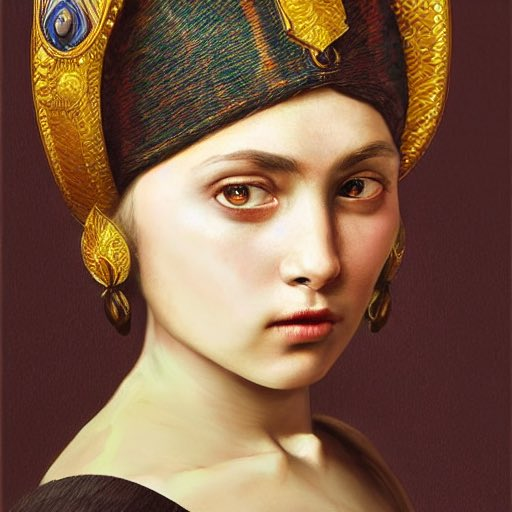

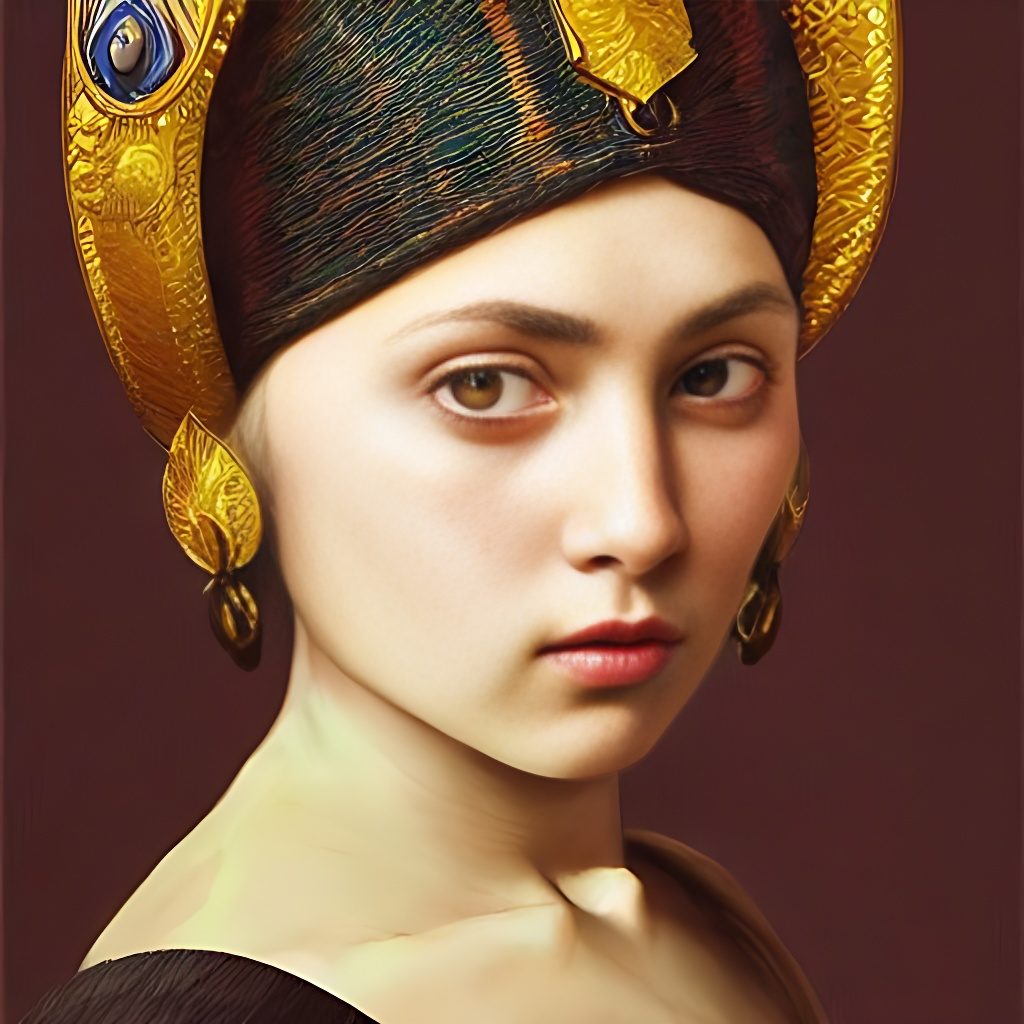

In [ ]:
# Displaying the input image
input_image_path = "/content/input.jpg"  # Path to the input image
display(Image(filename=input_image_path, width=400))

# Displaying the output image
output_image_path = str(result)  # Path to the output image
display(Image(filename=output_image_path, width=400))
